
# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains 110,527 medical appointments in Brazil, indicating whether each patient attended or missed their appointment.

The dataset has the following columns which are self-explanatory:
* **PatientId** - unique identifier for patients 
* **AppointmentID** - unique identifier for appointments 
* **Gender** - Patient’s gender
* **ScheduledDay** - Date when the appointment was scheduled
* **AppointmentDay** - Date when it was set to occur.
* **Age** - Patient’s age
* **Neighbourhood** - Location of the medical facility
* **Scholarship** - Indicates whether the patient is enrolled in a welfare program
* **Hipertension, Diabetes, Alcoholism, Handcap** - Indicates whether the patient has these conditions
* **SMS_received** - Whether the patient received an SMS reminder
* **No-show** (**No** means the patient showed up, **Yes** means he didn't show up)



### Question(s) for Analysis

* **Does receiving an SMS reminder increase attendance?**
* **Does gender affect how often patients miss their appointments?**
* **How does age affect appointment attendance?**
* **Is there a pattern in no-show rates based on the day of the week?**




In [3]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib as plt 

<a id='wrangling'></a>
## Data Wrangling

Assess and clean the dataset in order to prepare for future analysis.

### General Properties


In [ ]:
# Load the dataset from the CSV file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# print the first 5 rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# check the number of rows and columns in the dataset
df.shape

(110527, 14)

From the previous step, we observed that the dataset contains 110527 rows and 14 columns (features).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the previous result , we can observe the following :

1. **No Missing Values**:
   - All columns have **110,527 non-null values**, meaning there are no missing values. 


2. **Data Types**:  
   - **Numerical Columns (int64/float64)**:  
     - `PatientId`, `AppointmentID`, `Age`, `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handcap`, `SMS_received`.  
   - **Categorical Columns (object type)**:  
     - `Gender`, `ScheduledDay`, `AppointmentDay`, `Neighbourhood`, `No-show`.  


In [7]:
df.duplicated().sum()

0

**Note that there is no duplicated rows.**

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the previous result, we observe that the **minimum value for the Age column is -1**, which is likely an error and should be corrected.


### Data Cleaning
 
After assessing the data, we found issues like incorrect values and inconsistent data types. The next steps will clean and prepare it for analysis.  

 
  **Possible Issues**:  
   - Remove rows where **Age** is less than zero.
   - Convert `PatientId` from **float64** to an integer or string.  
   - Convert `ScheduledDay` and `AppointmentDay` to **datetime** format for better analysis.    
   - Rename **"Handcap"** to **"Handicap"** , and **Hipertension** to **Hypertension** to correct the spelling.  

### 1. Fixing Incorrect Values

In [10]:
# Removing rows with invalid age values
df = df.query("Age >= 0")

# Check the summary statistics after cleaning
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### 2. Fixing Inconsistent Data Types

In [11]:
# Convert PatientId from float64 to int
df['PatientId'] = df['PatientId'].astype(int)


# Convert ScheduledDay and AppointmentDay to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


# Verify the changes: 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int64              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

### 3. Fixing Column Name Typos

In [12]:
#Rename column names that contain typos:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

# Verify the changes:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  int64              
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

<a id='eda'></a>
## Exploratory Data Analysis

After cleaning the data, we can start exploring it to find useful patterns. This will help us understand which factors might affect whether a patient shows up for their appointment.


## Single-Variable Exploration

We start by exploring individual variables to understand their distributions.

1. **Gender**: We look at the number of appointments by gender.
2. **Age**: We plot the distribution of patient ages.
3. **Neighbourhood**: We identify which neighborhoods had the most appointments.

In [38]:
# function to plot a horizontal bar plot in one line
def plot_barh(series, title, xlabel, ylabel, figsize, color, alpha=0.8):
    series.plot(kind='barh', figsize=figsize, color=color)
    plt.pyplot.title(title)
    plt.pyplot.xlabel(xlabel)
    plt.pyplot.ylabel(ylabel)

### 1. Exploring Gender Distribution

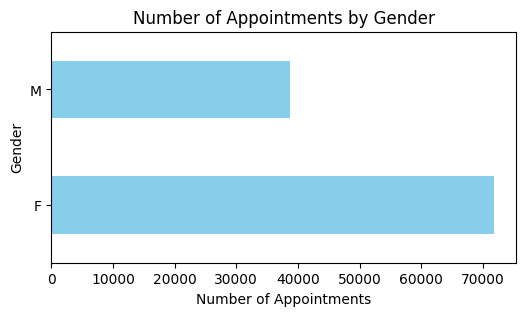

In [39]:
# number of appointments by gender
gender_counts = df['Gender'].value_counts()

plot_barh(
    gender_counts,
    title='Number of Appointments by Gender',
    xlabel='Number of Appointments',
    ylabel='Gender',
    color='skyblue',
    figsize=(6,3)
)


#### Observation:
There are slightly more female patients than male patients in the dataset, which may influence the overall no-show rate.

### 2. Exploring Age Distribution

<AxesSubplot: title={'center': 'Age Distribution of Patients'}, ylabel='Frequency'>

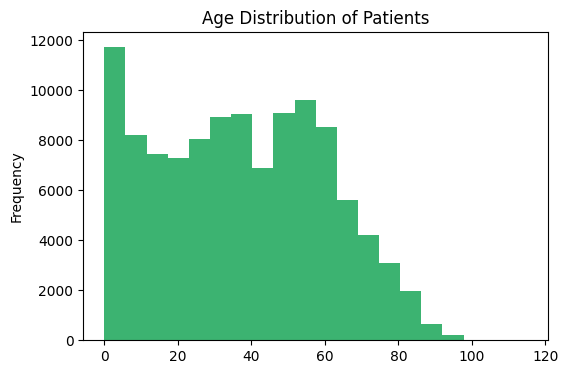

In [15]:
#  age distribution
df['Age'].plot.hist(
    bins=20,
    title='Age Distribution of Patients',
    color='mediumseagreen',
    figsize=(6,4)
)

#### Observation:
Most patients are adults between 20 and 60 years old. There are fewer very young and very old patients, but the age range is wide.

### 3. Exploring Appointments by Neighbourhood

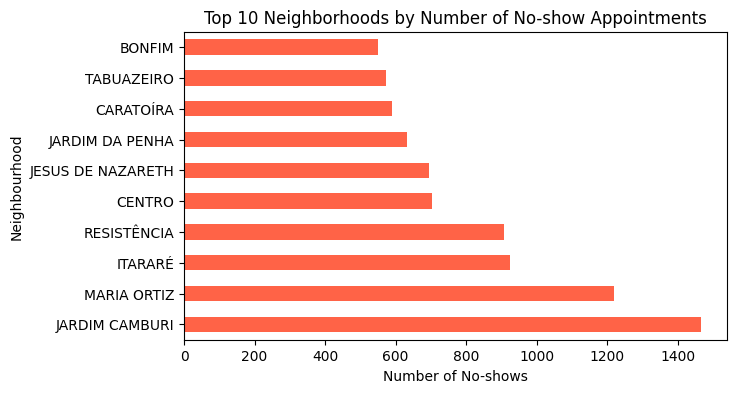

In [34]:
# Top 10 neighborhoods with the highest number of no-shows
top_noshow_neighborhoods = df.query("`No-show` == 'Yes'")['Neighbourhood'].value_counts().head(10)

plot_barh(top_noshow_neighborhoods,
    title='Top 10 Neighborhoods by Number of No-show Appointments',
    xlabel='Number of No-shows',
    ylabel='Neighbourhood',
    color='tomato',
    figsize=(7, 4)
)

#### Observation:
Some neighborhoods have a much higher number of no-show appointments than others. This could be due to population size or access to healthcare services.

## Multiple-Variable Exploration

In this section, we explore how different factors might affect whether or not a patient shows up for their appointment.

### 1. Does receiving an SMS reminder increase attendance?

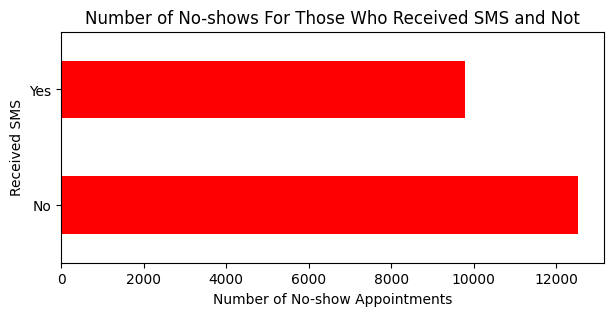

In [36]:
# The count of no-shows for patients who received or did not receive an SMS
SMS_series = df.query("`No-show` == 'Yes'").groupby('SMS_received').size()

plot_barh(SMS_series,
          title='Number of No-shows For Those Who Received SMS and Not', 
          xlabel='Number of No-show Appointments',
          ylabel='Received SMS',
          figsize=(7,3),
          color='r',
          )

plt.pyplot.yticks(ticks=range(2), labels=['No', 'Yes']);

#### Observation:
Patients who received an SMS reminder had a lower number of no-show appointments.

### 2. Does gender affect how often patients miss their appointments?

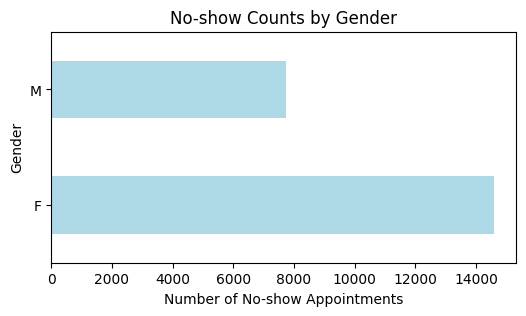

In [37]:
# the number of no-shows depending on gender
gender_noshow_counts = df.query("`No-show` == 'Yes'")['Gender'].value_counts()

plot_barh(gender_noshow_counts,
    title='No-show Counts by Gender',
    xlabel='Number of No-show Appointments',
    ylabel='Gender',
    color='lightblue',
    figsize=(6, 3)
)

#### Observation:
Female patients had more no-show appointments than male patients, likely because there are more female patients overall.

### 3. How does age affect appointment attendance?

<AxesSubplot: title={'center': 'No-show Counts by Age Group'}, xlabel='Age Group', ylabel='Number of No-show Appointments'>

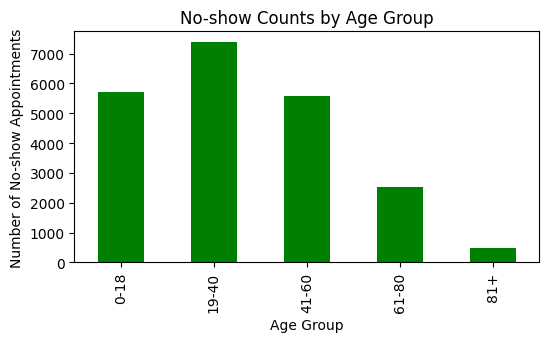

In [19]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 40, 60, 80, 120], labels=['0-18', '19-40', '41-60', '61-80', '81+'])

# Count no-shows per age group
agegroup_noshow_counts = df.query("`No-show` == 'Yes'")['AgeGroup'].value_counts().sort_index()


agegroup_noshow_counts.plot.bar(
    title='No-show Counts by Age Group',
    xlabel='Age Group',
    ylabel='Number of No-show Appointments',
    color='green',
    figsize=(6, 3)
)


#### Observation:
Younger age groups (especially **19–40**) had the highest number of missed appointments. In general, most no-shows were from patients aged 0 to 60.

### 4. Is there a pattern in no-show rates based on the day of the week?

<AxesSubplot: title={'center': 'No-show Counts by Day of the Week'}, xlabel='Day of the Week', ylabel='Number of No-show Appointments'>

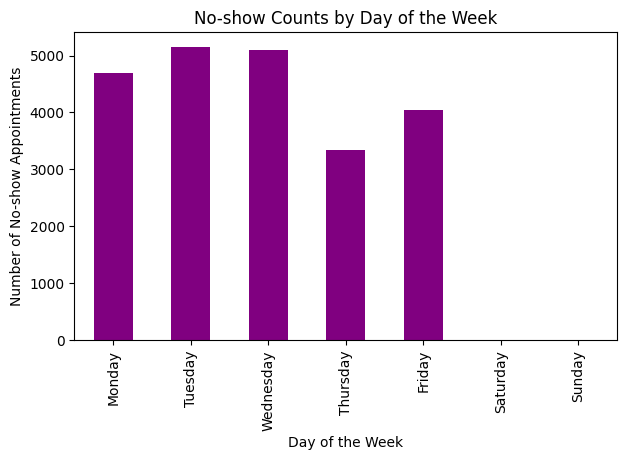

In [20]:
# Extract day of week
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()

# Count no-shows per day
day_noshow_counts = df.query("`No-show` == 'Yes'")['DayOfWeek'].value_counts()

# Reorder days to follow the natural weekly order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# fill missing days with 0
day_noshow_counts = day_noshow_counts.reindex(ordered_days, fill_value=0)

day_noshow_counts.plot.bar(
    title='No-show Counts by Day of the Week',
    xlabel='Day of the Week',
    ylabel='Number of No-show Appointments',
    color='purple',
    figsize=(7, 4)
)

#### Observation:
* No-shows occurred on all weekdays except Saturday and Sunday, with Tuesday and Wednesday having the highest numbers. This may be because people are busier during the middle of the week.

* Saturday and Sunday likely had no appointments scheduled, which is common in many healthcare centers.

<a id='conclusions'></a>
## Conclusions

- Patients who received an SMS reminder had slightly fewer no-show appointments, but the difference was small. More data or further analysis is needed to understand the actual impact of SMS reminders.

- Female patients had a higher number of no-shows than male patients, which may be due to their larger representation in the dataset. However, gender alone cannot explain attendance behavior.

- Younger patients, especially those aged between 19 and 40, missed more appointments than older patients. This may reflect differences in routine, availability, or priorities among age groups.

- No-show counts were highest on Tuesdays and Wednesdays, while no appointments were scheduled on Saturdays and Sundays. The midweek peak might relate to work or school commitments, but further investigation would be needed to confirm that.

## Limitations

- The dataset doesn’t include other possible reasons for missing appointments—like transportation, weather, or personal emergencies ,so the full picture is still missing.

- The dataset only covers one region in Brazil, so the findings might not apply to other areas with different healthcare systems or populations.

To get clearer answers, we’d need more detailed data and some statistical testing.

In [40]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 537895 bytes to Investigate_a_Dataset.html
